In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load encoded dataset
df = pd.read_csv('/content/sample_data/heart_disease.csv')

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']


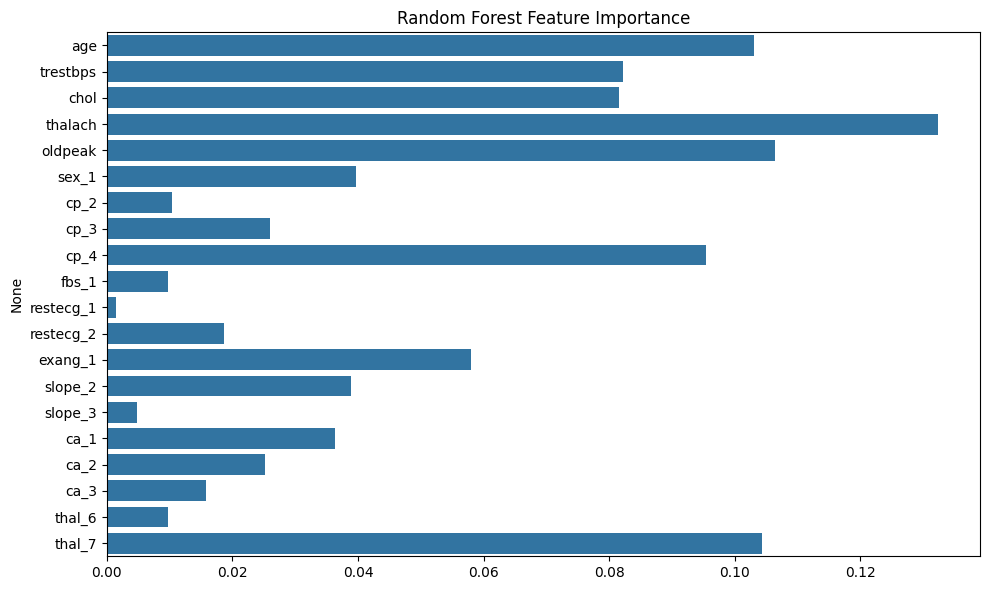

In [2]:
# step 1: Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


In [3]:
# Step 2: Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the base model
model = LogisticRegression(max_iter=1000)

# Run RFE
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Show selected features
selected_features = X.columns[rfe.support_]
print("Top 10 features selected by RFE:\n", selected_features)


Top 10 features selected by RFE:
 Index(['oldpeak', 'sex_1', 'cp_2', 'cp_4', 'exang_1', 'slope_2', 'ca_1',
       'ca_2', 'ca_3', 'thal_7'],
      dtype='object')


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# 1. Scale with MinMaxScaler to ensure all values are ≥ 0
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

# 2. Apply Chi-Square
chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(X_minmax, y)

# 3. Get selected feature names
chi2_features = X.columns[chi2_selector.get_support()]
print("Top 10 features selected by Chi-Square:\n", chi2_features)


Top 10 features selected by Chi-Square:
 Index(['oldpeak', 'cp_2', 'cp_3', 'cp_4', 'exang_1', 'slope_2', 'ca_1', 'ca_2',
       'ca_3', 'thal_7'],
      dtype='object')


In [6]:
final_features = set(selected_features) & set(chi2_features)
print("Final selected features:", final_features)

X_selected = X[list(final_features)]


Final selected features: {'cp_4', 'ca_3', 'ca_1', 'ca_2', 'thal_7', 'oldpeak', 'exang_1', 'cp_2', 'slope_2'}


In [8]:
selected_features = [
    'oldpeak', 'sex_1', 'cp_2', 'cp_4', 'exang_1',
    'slope_2', 'ca_1', 'ca_2', 'ca_3', 'thal_7'
]

# Reduce the dataset
X_selected = X[selected_features]
X_selected['target'] = y

# Save to CSV
X_selected.to_csv("Reduced_dataset.csv", index=False)


/tmp/ipython-input-8-3091927883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y
